In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('advanced.csv')

In [3]:
# convert numerical fields to correct datatype
numeric_cols = [col for col in df.columns if col not in ['Season', 'Tm', 'Lg', 'Pos']]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [12]:
# remove unnamed columns
df = df[df.columns.drop(list(df.filter(regex='Unnamed')))]

In [13]:
# remove any obs of DID NOT PLAY
discard = ['Did Not Play']
df = df[df['Pos'].str.contains('|'.join(discard))==False]

In [14]:
# very few are listed in multiple positions
# reduce to PG, SG, SF, PF, C
valid_pos = ['PG', 'SG', 'SF', 'PF', 'C']
df = df[df['Pos'].isin(valid_pos)]

In [35]:
# reduce df to seasons where player played at least 20 games
df = df[df['G'] >= 20]

In [16]:
sns.set_style('darkgrid')

In [17]:
df.head(1)

,Season,Age,Tm,Lg,Pos,G,MP,PER,TS%,3PAr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1990-91,21,DEN,NBA,PG,67,1505,12.2,0.448,0.099,...,9.5,27.2,-0.7,-0.3,-1.0,-0.031,-2.0,-3.0,-5.0,-1.1


In [23]:
df['BPM'].corr(df['WS/48'])

0.8872030241403193

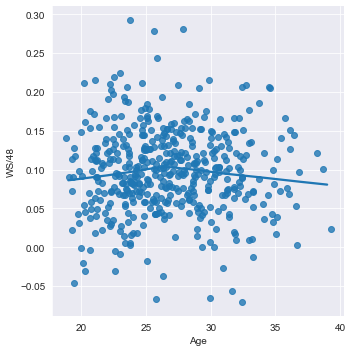

In [36]:
sns.lmplot(data=df, x='Age', y='WS/48', x_jitter=1, lowess=True)
plt.show()